# Activity 7 - Feature Engineering and Model Comparison

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import mglearn.plots
import mglearn.datasets
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, ward
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# import sklearn.datasets as datasets
# from sklearn.datasets import make_blobs
# from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import fetch_lfw_people
# from sklearn.datasets import load_digits
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
# from sklearn.datasets import load_wine

In [3]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# ONE-HOT-ENCODING (DUMMY VARIABLES)

In [4]:
# import mglearn as mglearn
# import pandas as pd
# import os
# This file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly to "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False, 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                          'marital status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                          'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 
            'occupation', 'income']]
# IPython display allows nice output formatting within the Spyder
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


# Checking string-encoded categorical data

In [5]:
print(data.gender.value_counts())
print(data.gender.value_counts())
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

 Male      21790
 Female    10771
Name: gender, dtype: int64
 Male      21790
 Female    10771
Name: gender, dtype: int64
Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair'

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


# Applying logistic regression

In [8]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


# Numbers can encode categoricals

In [9]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


# One-hot-encoded version of the data, leaving the integer feature unchanged

In [10]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


# One-hot-encoding of both integer and string features

In [11]:
# Explicitly listing the columns to encode
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
demo_df.style.format("{:.2%}")
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 1)  # or 199
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Comparison of a linear regression model and a decision tree regressor

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


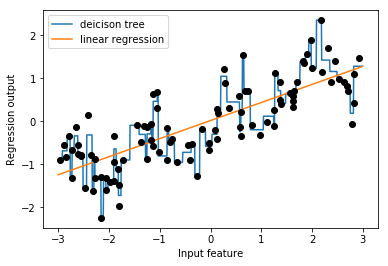

In [12]:
# Generate Dataset
import mglearn as mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# plot dataset
import matplotlib.pyplot as plt
import numpy as np
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="deicison tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

# Partitioning an input range

In [13]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

# Record for each data point the classifying bin
which_bin = np.digitize(X, bins=bins)
print("\nData points: \n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


# Transforming discrete feature using one-hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
# transfrom using the OneHotEncoder
encoder = OneHotEncoder(sparse = False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Building new models with discrete transformation

X_binned.shape: (100, 10)


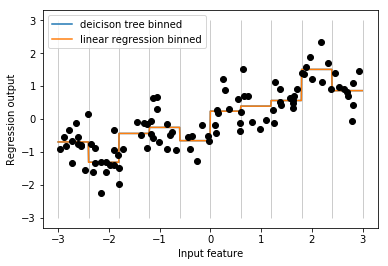

In [15]:
print("X_binned.shape: {}".format(X_binned.shape))
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="deicison tree binned")
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# Adding interaction or product feature

(100, 11)


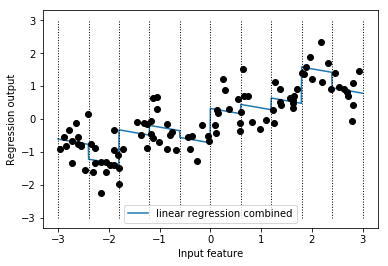

In [16]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="linear regression combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

(100, 20)


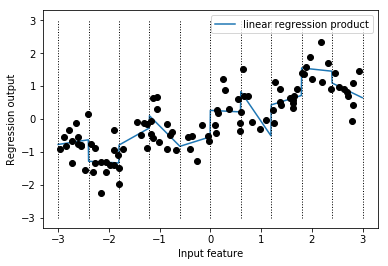

In [17]:
# Adding interaction or product feature cont'd

# Adding product feature
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')


# Using polynomials features

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x**10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))

print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)
Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


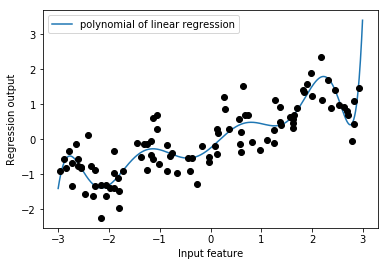

In [19]:
# Using Polynomials Features cont'd

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="polynomial of linear regression")
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

# Comparing polynomial models to kernel svm

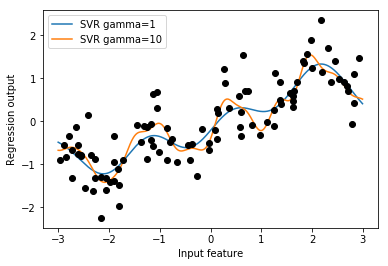

In [20]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k') 

# Applying polynomial features to boston housing dataset

In [21]:
# Generate Dataset
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    random_state=0)
# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


# Applying polynomial features to boston housing dataset using ridge

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


# Applying polynomial features to boston housing dataset using random forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.803
Score with interactions: 0.771


# Univariate nonlinear transformations

Number of feature appearance:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

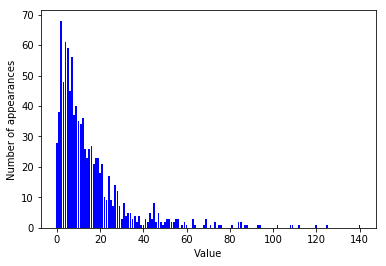

In [24]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("Number of feature appearance:\n{}".format(np.bincount(X[:, 0])))

# Visualize the counts
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")


# Illustration with ridge regression model

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Test score: 0.875


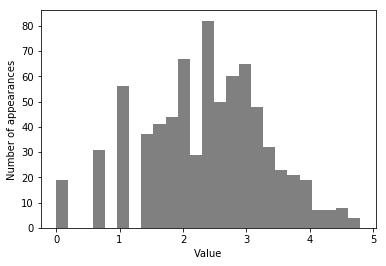

In [26]:
# Applying a logramithic transformation
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test+1)
plt.hist(X_train_log[:, 0], bins = 25, color = 'gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
# Building a Ridge Model
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

# UNIVARIATE STATISTICS

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# Generate Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 58% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

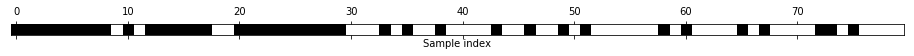

In [28]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [29]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


# MODEL-BASED FEATURE SELECTION

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

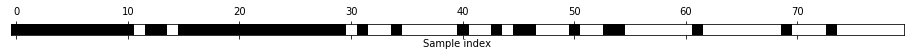

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
select = SelectFromModel(rfc, threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [31]:
X_test_l1 = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_l1, y_train)
print("Test Score: {:.3f}".format(lr.score(X_test_l1, y_test)))

Test Score: 0.951


# ITERATIVE FEATURE SELECTION - RECURSIVE FEATURE ELIMINATION

Test Score using Logistics Regression: 0.951
Test score uisng RFE: 0.951


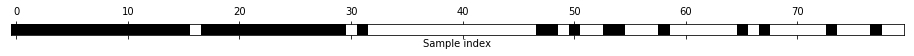

In [32]:
from sklearn.feature_selection import RFE
select = RFE(rfc, n_features_to_select = 40)
select.fit(X_train, y_train)
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_rfe, y_train)
print("Test Score using Logistics Regression: {:.3f}".format(lr.score(X_test_rfe, y_test)))
print("Test score uisng RFE: {:.3f}".format(select.score(X_test, y_test)))

# UTILIZING EXPERT KNOWLEDGE

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mglearn
import pandas as pd
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00    3 
2015-08-01 03:00:00    0 
2015-08-01 06:00:00    9 
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

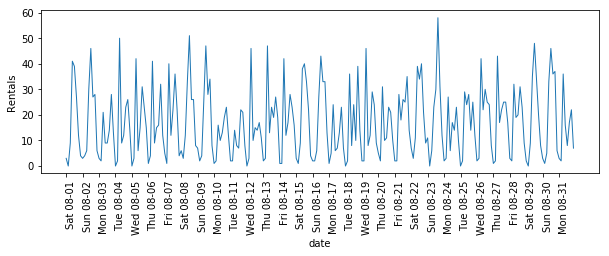

In [34]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), 
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("date")
plt.ylabel("Rentals")

# Cross-Validation

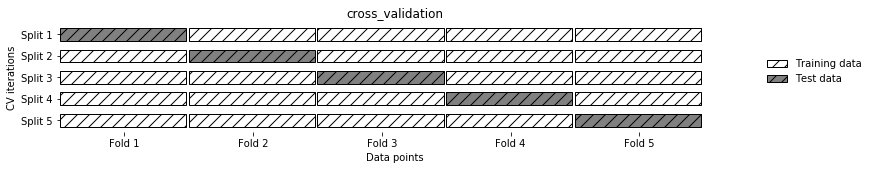

In [35]:
import mglearn as mglearn
mglearn.plots.plot_cross_validation()

# Cross-Validation in Scikit-learn on Iris dataset

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]
Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]
Average cross-validation score: 0.96


# STRATIFIED K-FOLD CROSS-VALIDATION

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


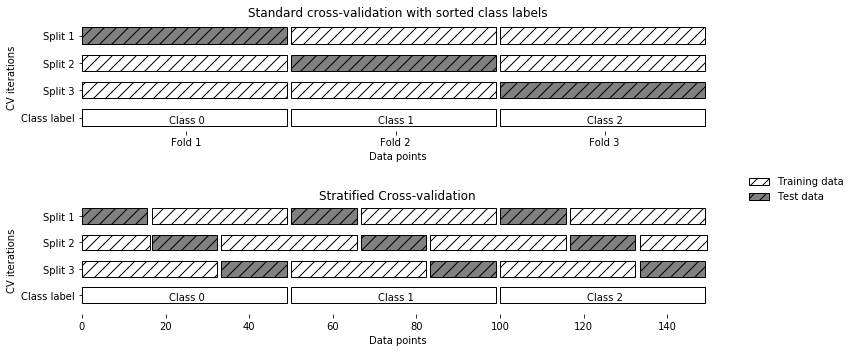

In [37]:
import mglearn as mglearn
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))
mglearn.plots.plot_stratified_cross_validation()

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
logreg = LogisticRegression()

kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("Cross-validation scores: \n{}".format(scores))

kfold = KFold(n_splits=3)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("Cross-validation scores: \n{}".format(scores))

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("Cross-validation scores: \n{}".format(scores))

Cross-validation scores: 
[1.         0.93333333 0.43333333 0.96666667 0.43333333]
Cross-validation scores: 
[0. 0. 0.]
Cross-validation scores: 
[0.9  0.96 0.96]


# LEAVE_ONE_OUT CROSS-VALIDATION

In [39]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


# SHUFFLE-SPLIT CROSS-VALIDATION

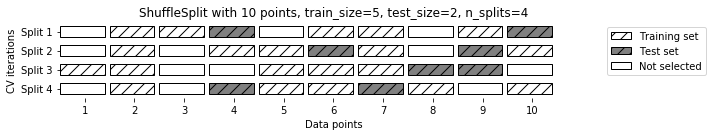

In [40]:
mglearn.plots.plot_shuffle_split()
#Shuffle split with 10 points, train_size=5, test_size=2, n_splits=4

In [41]:
# The following code splits the dataset into 50% training set and 50% test set for 10 iterations:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size =.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores: \n{}".format(scores))

Cross-validation scores: 
[0.93333333 0.98666667 0.89333333 0.96       0.90666667 0.86666667
 0.96       0.90666667 0.92       0.94666667]


# CROSS-VALIDATION WITH GROUPS

Cross-validation scores: 
[0.75       0.8        0.66666667]


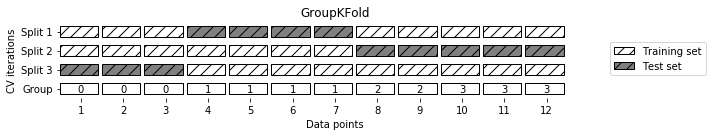

In [42]:
import mglearn as mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
# Create synthetic datasets
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group
# ten the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
logreg = LogisticRegression()
groupkfold = GroupKFold(n_splits=3)
scores = cross_val_score(logreg, X, y, groups, cv=groupkfold)
print("Cross-validation scores: \n{}".format(scores))
mglearn.plots.plot_group_kfold()


# GRID SEARCH

In [43]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
print("Size of training set: {}".format(
        X_train.shape[0], X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set)
        score = svm.score(X_test, y_test)
        # if we got a better score, stor ethe score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

print("Best score: {:.2f}".format(best_score))
print("best parameters: {}".format(best_parameters))

Size of training set: 112
Best score: 0.97
best parameters: {'C': 100, 'gamma': 0.001}


# THE DANGER OF OVERFITTING THE PARAMETERS AND THE VALIDATION SET

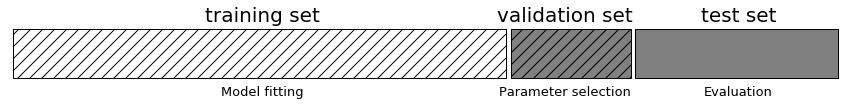

In [44]:
import mglearn as mglearn
mglearn.plots.plot_threefold_split()

In [45]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
# split the data into train + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
# split the train + validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, 
                                                    random_state=1)
print("Size of training set: {}  size of validation set: {}  size of tets set:"
      "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set)
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

Size of training set: 84  size of validation set: 28  size of tets set:38



In [46]:
# rebuild a model on the combined training and validation set,
# and evalaute it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score: {:.2f}".format(best_score))
print("best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score: 0.96
best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


# GRID SEARCH WITH CROSS-VALIDATION

In [47]:
import mglearn as mglearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
# split the data into train + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
# split the train + validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, 
                                                    random_state=1)
print("Size of training set: {}  size of validation set: {}  size of tets set:"
      "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        #perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, stor ethe score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

Size of training set: 84  size of validation set: 28  size of tets set:38



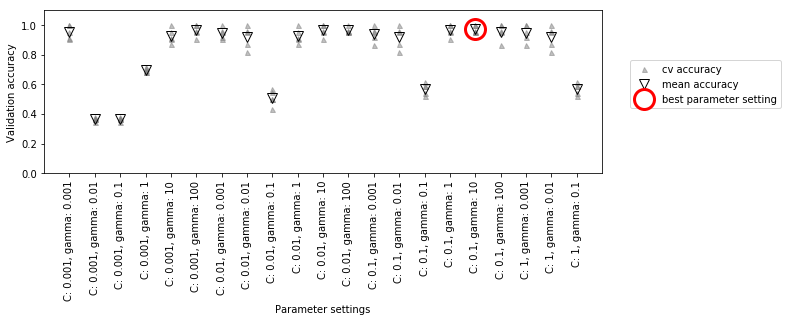

In [48]:
# rebuild a model on the combined training and validation set,
# and evalaute it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
mglearn.plots.plot_cross_val_selection()

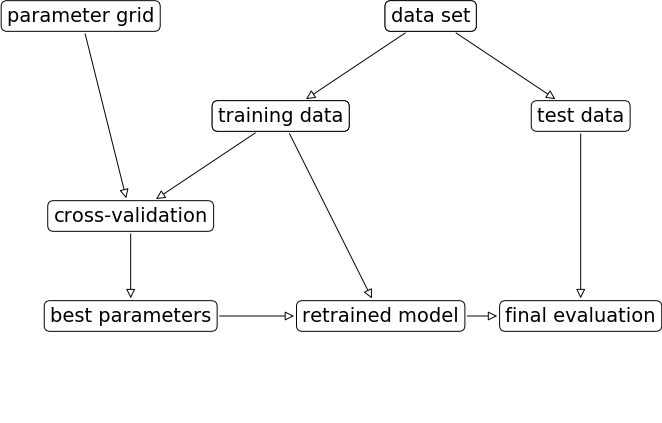

In [49]:
mglearn.plots.plot_grid_search_overview()

# Using gridsearchcv class

In [50]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
grid_search.fit(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Test set score {:.2f}".format(test_score))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score 0.97


In [51]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
grid_search.fit(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Test set score {:.2f}".format(test_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Analyzing the result of cross-validation

In [52]:
import pandas as pd
#convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
#results.head(5)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000502,0.000002,0.000500,0.000001,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000820,0.000263,0.000298,0.000396,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000395,0.000484,0.000401,0.000491,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000601,0.000491,0.000201,0.000401,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000802,0.000750,0.000200,0.000401,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


# Heat map of mean cross-validation score as a function of c and gamma

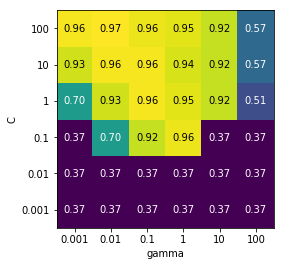

In [53]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

# Experimenting with different search ranges

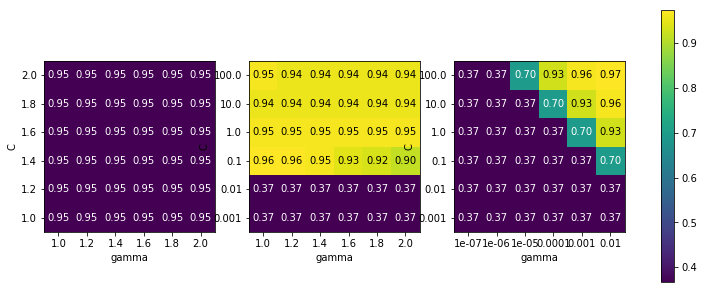

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.logspace(-3, 2, 6),
                      'gamma':np.linspace(1, 2, 6)}
param_grid_range = {'C':np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores =grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

# Search over spaces that are not grids

In [55]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00040102,0.000601912,0.000601339,0.000400829,0.000400829,0.000601578,0.000401068,0.000601578,0.00040102,0.000608349,0.000501394,0.000501204,0.000607395,0.00059557,0.000599813,0.00059576,0.000802326,0.000401115,0.000401115,0.000601578,0.000601864,0.000601625,0.000400591,0.000401402,0.000600576,0.000601482,0.000501156,0.000301266,0.000601673,0.000401068,0.000601673,0.000801563,0.000401497,0.00040102,0.00100269,0.00100269
std_fit_time,0.000491147,0.000491459,0.000490992,0.000490914,0.000490914,0.000491186,0.000491206,0.000491186,0.000491147,0.000382503,1.27949e-06,1.68182e-06,0.000496108,0.000486402,0.000489748,0.000486565,0.000401164,0.000491264,0.000491264,0.000491186,0.00049142,0.000491225,0.000490622,0.000491615,0.000490369,0.000200415,3.37175e-07,0.000245984,0.000491264,0.000491206,0.000491264,0.000400782,0.000491731,0.000491147,1.51241e-06,1.90735e-07
mean_score_time,0.000401115,0.00020051,0,0,0.000401068,0.000200605,0.000200272,0.00020051,0.000200415,0.000300694,0.00019989,0.000301075,0,0.000200558,0.00020647,0.00020051,0,0.00020051,0.000200558,0,0.000200558,0.000200462,0,0.000200558,0.00030179,0.000100231,0.000100231,0.00020051,0,0.000200605,0.000200605,0,0.00020051,0.000200605,0,0
std_score_time,0.000491264,0.00040102,0,0,0.000491206,0.000401211,0.000400543,0.00040102,0.000400829,0.000400865,0.000244816,0.000245836,0,0.000401115,0.000412941,0.00040102,0,0.00040102,0.000401115,0,0.000401115,0.000400925,0,0.000401115,0.000402308,0.000200462,0.000200462,0.00040102,0,0.000401211,0.000401211,0,0.00040102,0.000401211,0,0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01
params,"{'C': 0.001, 'gamma': 1e-07}","{'C': 0.001, 'gamma': 1e-06}","{'C': 0.001, 'gamma': 1e-05}","{'C': 0.001, 'gamma': 0.0001}","{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.01, 'gamma': 1e-07}","{'C': 0.01, 'gamma': 1e-06}","{'C': 0.01, 'gamma': 1e-05}","{'C': 0.01, 'gamma': 0.0001}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.1, 'gamma': 1e-07}","{'C': 0.1, 'gamma': 1e-06}","{'C': 0.1, 'gamma': 1e-05}","{'C': 0.1, 'gamma': 0.0001}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 1.0, 'gamma': 1e-07}","{'C': 1.0, 'gamma': 1e-06}","{'C': 1.0, 'gamma': 1e-05}","{'C': 1.0, 'gamma': 0.0001}","{'C': 1.0, 'gamma': 0.001}","{'C': 1.0, 'gamma': 0.01}","{'C': 10.0, 'gamma': 1e-07}","{'C': 10.0, 'gamma': 1e-06}","{'C': 10.0, 'gamma': 1e-05}","{'C': 10.0, 'gamma': 0.0001}","{'C': 10.0, 'gamma': 0.001}","{'C': 10.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 1e-07}","{'C': 100.0, 'gamma': 1e-06}","{'C': 100.0, 'gamma': 1e-05}","{'C': 100.0, 'gamma': 0.0001}","{'C': 100.0, 'gamma': 0.001}","{'C': 100.0, 'gamma': 0.01}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.708333,0.375,0.375,0.375,0.375,0.708333,0.875,0.375,0.375,0.375,0.708333,0.875,1,0.375,0.375,0.708333,0.875,1,1
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,0.347826,0.347826,0.347826,0.695652,0.913043,0.956522,0.347826,0.347826,0.695652,0.913043,0.956522,0.956522
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.681818,0.363636,0.363636,0.363636,0.363636,0.681818,1,0.363636,0.363636,0.363636,0.681818,1,1,0.363636,0.363636,0.681818,1

# Search over spaces that are not grids

In [56]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))   
grid_search = GridSearchCV(SVC(), param_grid, return_train_score= True, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


# NESTED CROSS-VALIDATION

In [57]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


# NESTED CROSS-VALIDATION - selection

In [58]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter uisng inner cross-validation
        best_params = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using our training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


# Imbalanced datasets

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
#creating a 9:1 imbalanced dataset from the digits by classifying 9 
#against the nine other classes
y = digits.target == 9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        digits.data, y, random_state=0)

# Using the dummy classifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

import numpy as np
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [60]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.92
Dummy score: 0.80
logreg score: 0.98


# CONFUSION MATRICES

Confusion matrix:
[[401   2]
 [  8  39]]


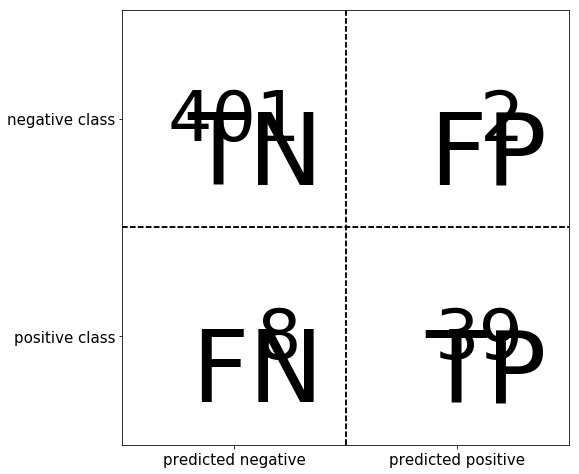

In [61]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
import mglearn as mglearn
mglearn.plots.plot_confusion_matrix_illustration()
mglearn.plots.plot_binary_confusion_matrix()

# SUMMARIZING THE INFORMATION IN THE CONFUSION MATRIX

In [62]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
        f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
        f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.09
f1 score tree: 0.55
f1 score logistic regression: 0.89


# Comparing models using confusion matrices

In [63]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[367  36]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[401   2]
 [  8  39]]


# Classification report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



# Dummy classifier report

In [65]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.91      0.90       403
        nine       0.10      0.09      0.09        47

   micro avg       0.82      0.82      0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.82      0.82       450



# Logistic Regression report

In [66]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



# Taking uncertainty into account

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



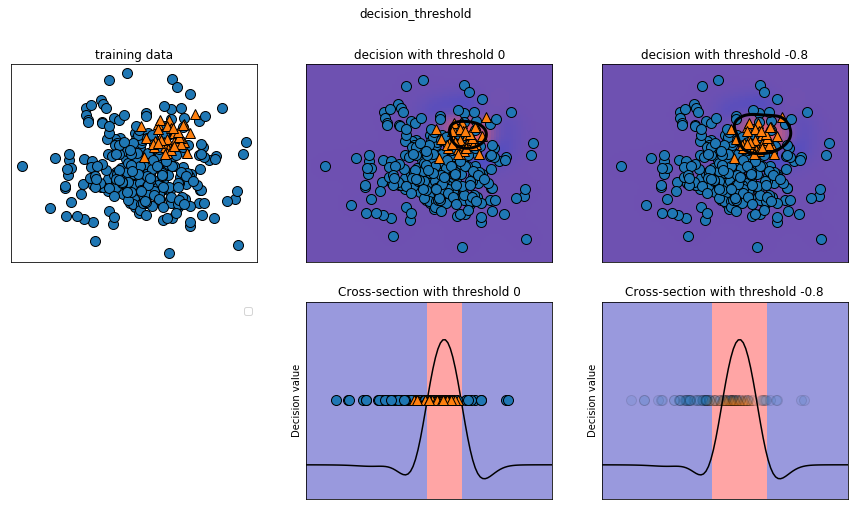

In [67]:
# Generate Dataset
import mglearn as mglearn
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
X, y = make_blobs(n_samples = (400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

# Taking uncertainty into account by increasing the threshold value

In [68]:
y_pred_lower_threshold = svc.decision_function(X_test) > .8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.50      0.44      0.47         9

   micro avg       0.92      0.92      0.92       113
   macro avg       0.73      0.70      0.71       113
weighted avg       0.92      0.92      0.92       113



# PRECISION-RECALL CURVES AND ROC CURVES

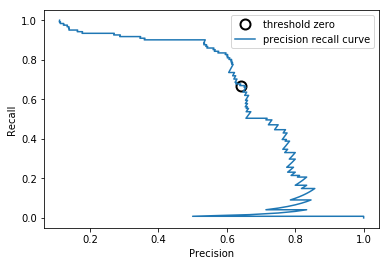

In [69]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))
# Use more data points for a smoother curve
X, y = make_blobs(n_samples = (4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
import matplotlib.pyplot as plt
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Comparing precision recall curves of svm and random forest

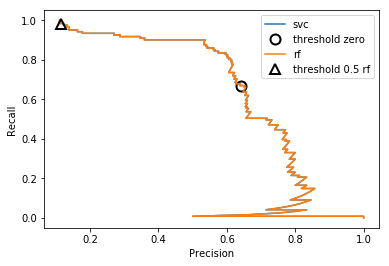

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,
                                                       rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision[close_default_rf], recall[close_default_rf], '^', markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Comparing precision recall curves of svm and random forest

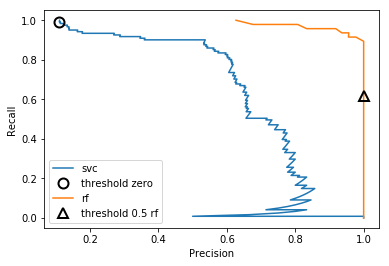

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,
                                                       rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Comparing svm and random forest using f-score

In [80]:
from sklearn.metrics import f1_score
print("f1_score of random forest: {:.3f}".format(
        f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


f1_score of random forest: 0.747
f1_score of svc: 0.000


# Average precision

In [81]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.985
Average precision of svc: 0.996


# Roc_auc_score function

In [82]:
from sklearn .metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for random forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for random forest: 0.998
AUC for SVC: 1.000


# Comparing roc curves of svms with different settings of gamma

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.12 accuracy = 0.90 AUC = 0.90
gamma = 0.01 accuracy = 0.90 AUC = 1.00


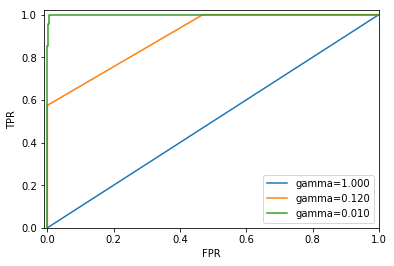

In [83]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn .metrics import roc_auc_score
from sklearn .metrics import roc_curve

digits = load_digits()
#creating a 9:1 imbalanced dataset from the digits by classifying 9 
#against the nine other classes
y = digits.target == 9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.12, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
            gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
 

# RECEIVER OPERATING CHARACTERISTICS (ROC) AND AUC

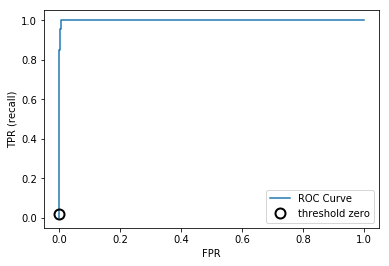

In [84]:
from sklearn .metrics import roc_curve
# False Positive Rate (FPR), True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# Find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Comparing roc curves for svm and random forest

IndexError: index 9 is out of bounds for axis 0 with size 8

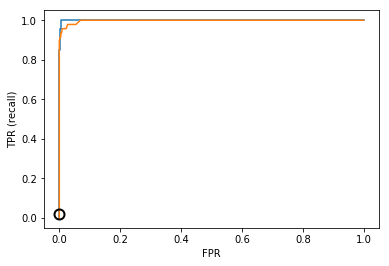

In [85]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,
                                          rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# Find threshold closest to zero
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', 
         markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# METRICS FOR MULTICLASS CLASSIFICATION

In [86]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

digits = load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred=lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


# Confusion matrix for the 10-digit classification task

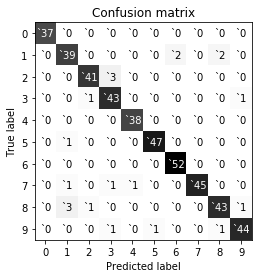

In [87]:
import mglearn as mglearn
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', xticklabels=digits.target_names,
                      ylabel='True label', yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="`%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

# Using classification_report function

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



# F1-score

In [89]:
from sklearn.metrics import f1_score
print("Micro average f1 score: {:.3f}".format(
        f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
        f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


# USING EVALUATION METRICS IN MODEL SELECTION

In [90]:
from sklearn.model_selection import cross_val_score
# default scoring for classification accuracy
print("Default scoring: {}".format(
            cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring = "accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                    scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
                                    scoring="roc_auc")
print("AUC accuracy scoring: {}".format(roc_auc))

Default scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]
AUC accuracy scoring: [0.99372294 0.98957947 0.99594929]


In [91]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn .metrics import roc_auc_score
from sklearn .metrics import roc_curve
from sklearn.model_selection import GridSearchCV
digits = load_digits()
#creating a 9:1 imbalanced dataset from the digits by classifying 9 
#against the nine other classes
y = digits.target == 9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        digits.data, y, random_state=0)
# We provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
from sklearn.metrics import roc_auc_score
print("Best cross-validation score (accuracy): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [92]:
# Using AUC Scoring instead
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring ="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
from sklearn.metrics import roc_auc_score
print("Best cross-validation score (accuracy): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (accuracy): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


# Available scorers

In [93]:
from sklearn.metrics.scorer import SCORERS
print("Availablescorers: \n{}".format(sorted(SCORERS.keys())))

Availablescorers: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
